In [1]:
#import all packages needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#read telco customer data
melb_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
#read the head of the data(first 5 rows) 
melb_df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#print out the columns
#we must understand our data set as well.
melb_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Column identification
Customer ID - is the unique customer ID<br>
Gender<br>
Senior Citizen<br>
Partner<br>
Dependents<br>
Online Security<br>

In [5]:
#print out data type of each column
melb_df.info()
melb_df.dtypes
#expect no nulls since columns have non-null data
melb_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
#since total charge is not a number we must convert it to a number!
melb_df.TotalCharges = pd.to_numeric(melb_df.TotalCharges, errors='coerce')

##Notice that the Total charges column is just an object and not a float. therefore perfoming functions on that column it will not act as a number

In [7]:
#return shape of the matrix
melb_df.shape

(7043, 21)

In [8]:
##this line will give us the number of unique value in each column
##notice how customer ID has 7043, that is because all the ID are unqiue.
melb_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [9]:
#describe method will give us statistics on each column with numbers
melb_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
#value count will count the frequency for churn yes and no
print(melb_df.Churn.value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


In [11]:
#lets check the data for null values
print(melb_df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [12]:
#check columns for NA values
print(melb_df.isna().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [13]:
#review missing values
melb_df.loc[melb_df["TotalCharges"].isnull() ==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [14]:
#since Total charges have 0 it is a small % of the data set and it is safe to drop these columns
melb_df.dropna(how = 'any', inplace = True)

In [15]:
#check again to make sure NA are gone aswell as nulls
print(melb_df.isna().sum())
print(melb_df.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [16]:
melb_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
#since there are no missing data points we dont have points to analyze or smoothen out
#The best way to check that is to plot out the missing values on a chart as a percentage of the data in each column

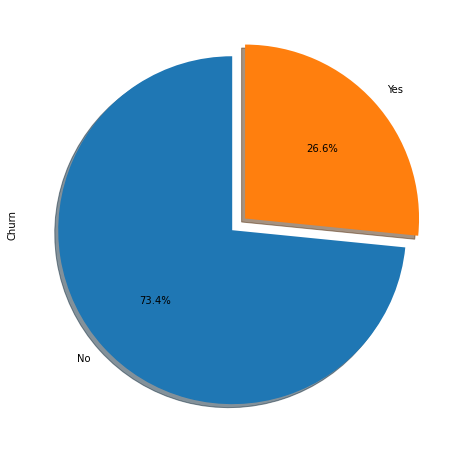

<AxesSubplot:xlabel='Churn', ylabel='count'>

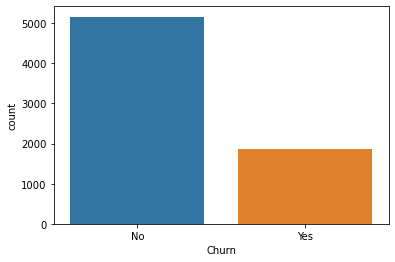

In [18]:
#create a pie chart of the churn
melb_df["Churn"].value_counts().plot.pie(explode =[0.05,0.05], autopct = "%1.1f%%", startangle = 90, shadow = True, figsize= (8,8))
plt.show()
sns.countplot(x=melb_df.Churn)

In [19]:
#since Tenure is measured in days we need to bin that into weeks so then we have a better understanding 
#of how churn effects tenure by the week instead of the day count
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
print(labels)
melb_df['tenure_grouped'] = pd.cut(melb_df.tenure, range(1, 80, 12), right=False, labels=labels)
melb_df['tenure_grouped'].value_counts()
melb_df

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grouped
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13 - 24
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61 - 72
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1 - 12
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1 - 12


the countplot will plot for all column with respect to churn on gender
the countplot will plot for all column with respect to churn on SeniorCitizen
the countplot will plot for all column with respect to churn on Partner
the countplot will plot for all column with respect to churn on Dependents
the countplot will plot for all column with respect to churn on PhoneService
the countplot will plot for all column with respect to churn on MultipleLines
the countplot will plot for all column with respect to churn on InternetService
the countplot will plot for all column with respect to churn on OnlineSecurity
the countplot will plot for all column with respect to churn on OnlineBackup
the countplot will plot for all column with respect to churn on DeviceProtection
the countplot will plot for all column with respect to churn on TechSupport
the countplot will plot for all column with respect to churn on StreamingTV
the countplot will plot for all column with respect to churn on StreamingMovies


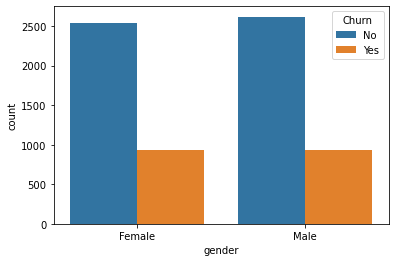

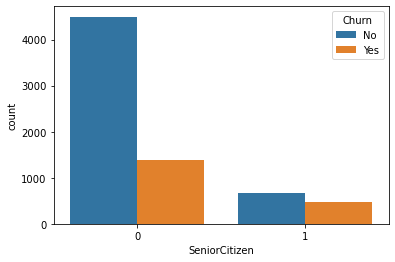

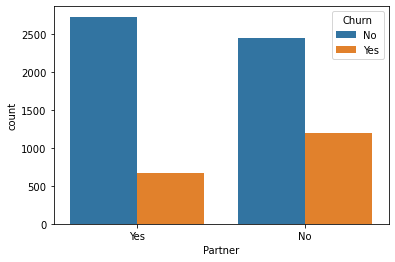

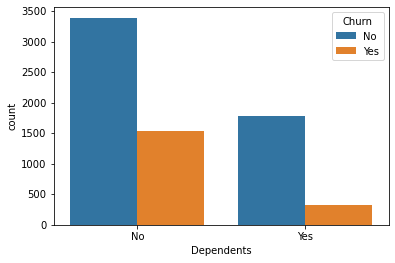

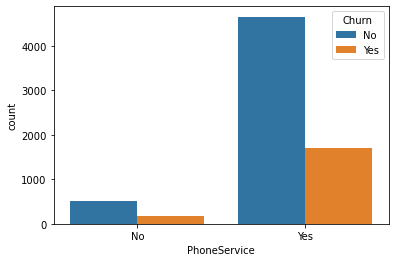

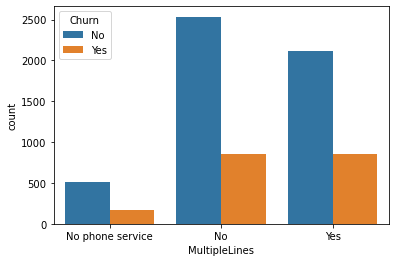

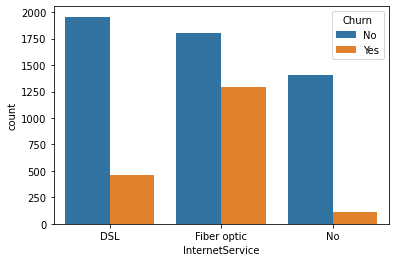

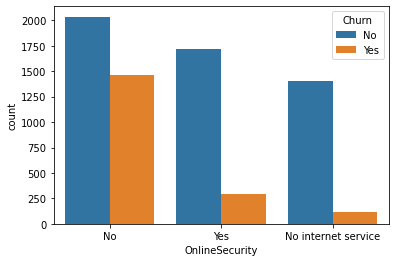

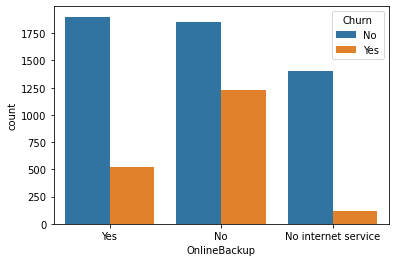

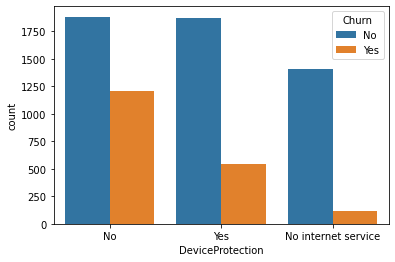

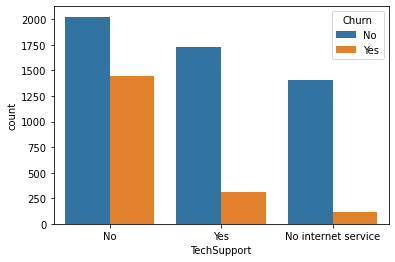

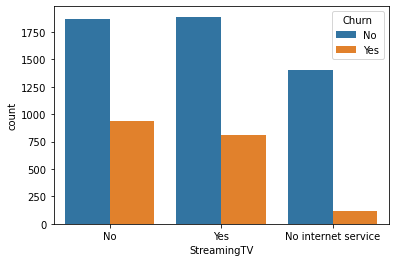

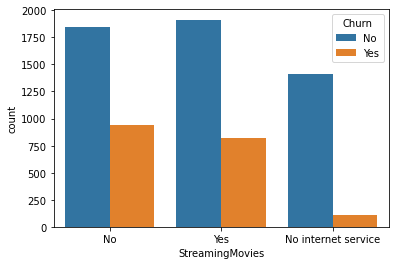

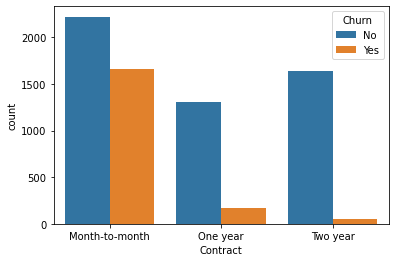

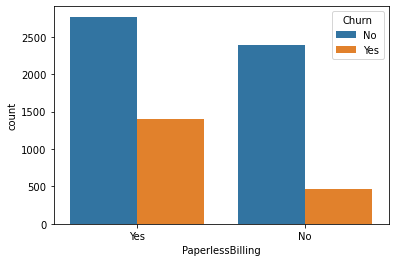

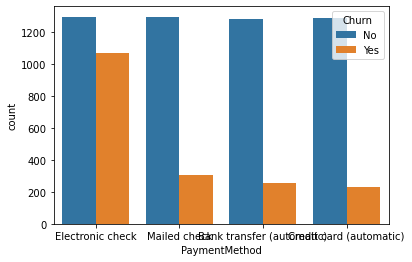

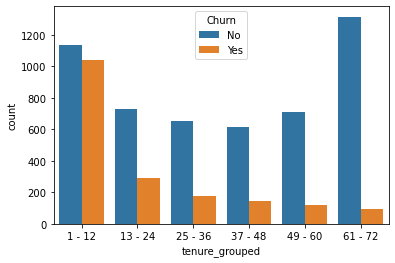

In [20]:
#use seaborn to plot all 
for i, predictor in enumerate(melb_df.drop(columns=['customerID','Churn', 'TotalCharges', 'MonthlyCharges','tenure'])):
    plt.figure(i)
    sns.countplot(data=melb_df, x=predictor, hue='Churn')

    print("the countplot will plot for all column with respect to churn on "+ predictor)

### GENDER - Gender does not appear to impact churn, there is a 50/50 split between gender and both churned at nearly the same rate.

### SENIOR CITIZEN - Senior Citizens appear to churn at a higher rate than non seniors. In the dataset there are more non seniors that did not churn

### PARTNER - people without a partner churn at higher rates than people with a partner. This can be because their is more purchasing power/ household income with 2 people

### DEPENDENTS - people without dependents churned at higher rates than people with dependents. 

### INTERNET SERVICE - people with Fiber Optic internet service churned at the higher rate among people with the service. This can be a potential pain point customer success teams can address

### ONLINE SECURITY - people with no internet security and had service churned at the highest rate in the group

### ONLINE BACKUP - people with no online backup service also churned at a high rate in the group

### DEVICE PROTECTION - people with no device protection service also churned at a high rate in the group

### TECH SUPPORT - people with no tech support service also churned at a high rate in the group

### STREAMING TV - poeple with or without the streaming service churned at almost the same rate

### STREAMING MOVIES - poeple with or without the streaming service churned at almost the same rate

### CONTRACT - Month to Month contracts churned at the highest rate among the group

### PAPERLESS BILLING - people with paperless billing churned at a higher rate than people with it. This can potentially be associated with age and the tech savy generation.

### PAYMENT METHOD - Electronic payment method churned at the highest among the group.

### TENURE - tenure between 1-12 month churned at the highest rates. This was expected because Month to Months can churn at anytime and also because one year contracts exist. one a contract is complete people usually look for another deal. Having domain knowledge is key to the understanding the data

In [21]:
#melb_df.groupby("x")["y"].value_counts()
#group by x and aggregate by y!
melb_df.groupby("gender")["Churn"].value_counts()

gender  Churn
Female  No       2544
        Yes       939
Male    No       2619
        Yes       930
Name: Churn, dtype: int64

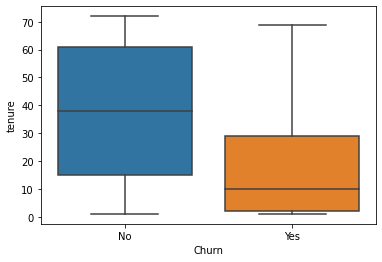

In [22]:
#box plot churn and tenure. sym='' will remove outliers
sns.boxplot(x = melb_df['Churn'], y = melb_df['tenure'], data = melb_df, sym='')
plt.show()

##According to the box plot people who churn usually do an average of ~10 months.

C:\Users\jamaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


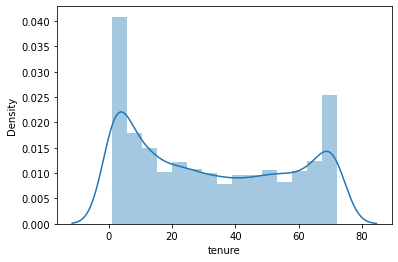

In [23]:
sns.distplot(melb_df['tenure'])
plt.show()

##The Histogram above tells us that the data is heavily distributed in the 0-10 month mark and also the 60+ month. 

In [24]:
#lets feature the data now and find correlations to figure out which features to drop
#if there are states we need to use one hot coding

In [25]:
from sklearn.preprocessing import MinMaxScaler

#Remove customer IDs from the data set and drop charges to create dummies
df2 = melb_df.iloc[:,1:]
df2.drop(columns =["MonthlyCharges","TotalCharges","tenure"], inplace= True)
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables.
df_dummies = pd.get_dummies(df2)
df_dummies.head()

#check shape
df_dummies.shape

(7032, 49)

In [26]:
features1 = ["MonthlyCharges","TotalCharges","tenure"]
mmscaler= MinMaxScaler(feature_range = (0,1))
#scaler.fit(melb_df[features1])

#This step scaled the Monthly charges, total chargers and tenure between 0- 1 so then they do not become big factors for the logistic function
#pre scclaing without these I got 77% accuracy
X2_scaled = mmscaler.fit_transform(melb_df[features1])



In [27]:
X = df_dummies.iloc[:,:43].astype(str).astype(int).reset_index(drop = True)
X

,SeniorCitizen,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0,0,1,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,1,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0,0,1,1,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,1,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7028,0,0,1,0,0,1,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7029,0,0,1,0,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
7030,1,1,0,1,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1


In [28]:
#add columns back to the scaled series
X2_scaledDF = pd.DataFrame(X2_scaled, columns = ["MonthlyCharges","TotalCharges","tenure"])
X2_scaledDF

,MonthlyCharges,TotalCharges,tenure
0,0.115423,0.001275,0.000000
1,0.385075,0.215867,0.464789
2,0.354229,0.010310,0.014085
3,0.239303,0.210241,0.619718
4,0.521891,0.015330,0.014085
...,...,...,...
7027,0.662189,0.227521,0.323944
7028,0.845274,0.847461,1.000000
7029,0.112935,0.037809,0.140845
7030,0.558706,0.033210,0.042254


In [29]:
X3 = pd.concat([X,X2_scaledDF],axis = 1)
X3

,SeniorCitizen,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges,TotalCharges,tenure
0,0,0,1,0,0,1,1,0,1,0,...,0,0,1,0,0,1,0,0.115423,0.001275,0.000000
1,0,0,0,1,1,0,1,0,0,1,...,0,1,0,0,0,0,1,0.385075,0.215867,0.464789
2,0,1,0,1,1,0,1,0,0,1,...,0,0,1,0,0,0,1,0.354229,0.010310,0.014085
3,0,0,0,1,1,0,1,0,1,0,...,0,1,0,1,0,0,0,0.239303,0.210241,0.619718
4,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,0.521891,0.015330,0.014085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,1,0,1,0,1,0,1,...,0,0,1,0,0,0,1,0.662189,0.227521,0.323944
7028,0,0,1,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0.845274,0.847461,1.000000
7029,0,0,1,0,0,1,0,1,1,0,...,0,0,1,0,0,1,0,0.112935,0.037809,0.140845
7030,1,1,0,1,0,1,1,0,0,1,...,0,0,1,0,0,0,1,0.558706,0.033210,0.042254


In [30]:
#remove tenure = 0 because when we scaled the tenure. some were too small and it scalled them to zero
X3 = X3[X3.tenure != 0]
y = X3["Churn"]
X3 = X3.drop(columns = "Churn", axis =1)

In [31]:

#print out data type of each column

#expect no nulls since columns have non-null data
print(melb_df[features1].isna().sum())
print(melb_df[features1].isnull().sum())

MonthlyCharges    0
TotalCharges      0
tenure            0
dtype: int64
MonthlyCharges    0
TotalCharges      0
tenure            0
dtype: int64


<AxesSubplot:>

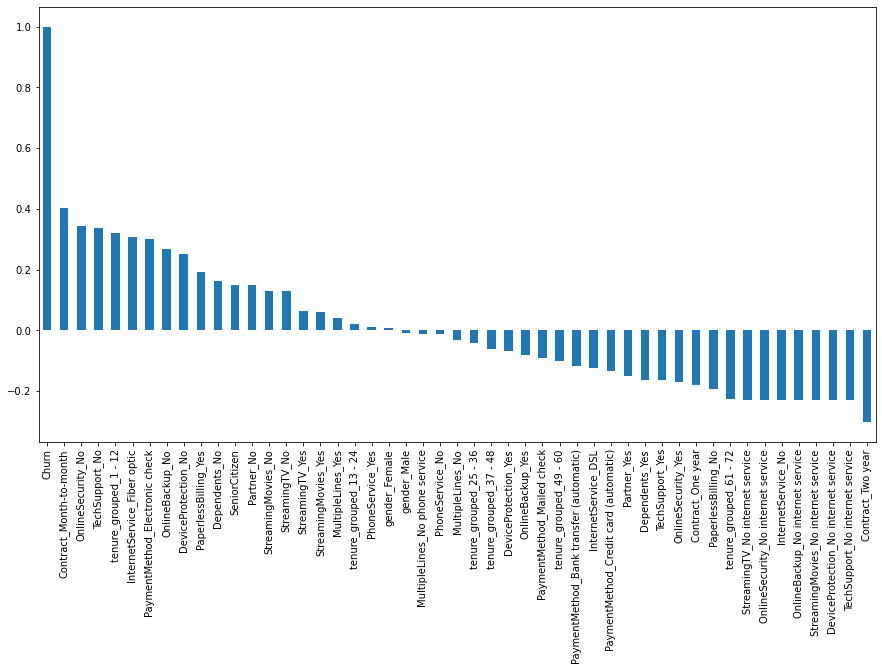

In [32]:
#review correlation of variables on churn. anything highly correlated should be removed so there is no multicollinearity. 
df_dummies.corr()
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

#the correlation bar chart does not appear to show any strong correlations

In [33]:
#need to DROP NaN , for some reason they entered back into the Dataframe
X.dropna(how = 'any', inplace = True)
y.dropna(how = 'any', inplace = True)


In [34]:
#feature churn again on the original Data
melb_df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
melb_df['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [35]:
#split data into X and y then start the train split test
X3.shape, y.shape

((6419, 45), (6419,))

In [36]:
#X train split with 80% to test and 20% to 
X_train, X_test, y_train, y_test = train_test_split(X3,y, test_size = 0.8, random_state = 42)

print("training set shape: ", X_train.shape, y_train.shape)
print("testing set shape: ", X_test.shape, y_test.shape)
print(X_train)

training set shape:  (1283, 45) (1283,)
testing set shape:  (5136, 45) (5136,)
      SeniorCitizen  gender_Female  gender_Male  Partner_No  Partner_Yes  \
568               0              1            0           1            0   
4585              0              1            0           1            0   
1425              0              1            0           1            0   
1001              0              0            1           1            0   
3783              0              0            1           1            0   
...             ...            ...          ...         ...          ...   
4137              0              0            1           1            0   
5693              1              0            1           0            1   
5733              1              0            1           0            1   
5911              1              1            0           1            0   
941               0              1            0           0            1   

      De

In [37]:
#train the model
from sklearn.linear_model import LogisticRegression
LogR_model = LogisticRegression()
result = LogR_model.fit(X_train, y_train)
y_pred = LogR_model.predict(X_test)

In [38]:
#now compare the prediction against the y_test, what are we predicting?!
from sklearn.metrics import *

print ("The accuracy of the model is : ", accuracy_score(y_test, y_pred))


The accuracy of the model is :  0.8121105919003115


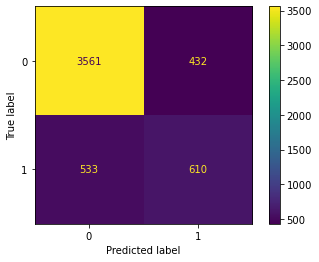

In [39]:
#Confusion matrix looks at the real accuracy of the data by comparing the predicted results the actuals. it check falses negatives and positives.

cm = confusion_matrix(y_test, y_pred)
cm
tn,fp,fn,tp = cm.ravel()
ConfusionMatrixDisplay(cm).plot()

#### TRUE POSITIVE - TOP LEFT

#### FALSE POSITIVE - TOP RIGHT

#### FALSE NEGATIVE - BOTTOM LEFT

#### TRUE POSITIVE - BOTTOM RIGHT

In [40]:
Recall = tp/(tp+fn) 
print("Recall :" + str(Recall))
Precision = tp/(tp+fp)
print("Precision :" + str(Precision))
Accuracy = (tp + tn)/(tp+ tn + fp + fn)
print("Accuracy :" + str(Accuracy))

Recall :0.5336832895888014
Precision :0.5854126679462572
Accuracy :0.8121105919003115


## Although the classification was correct 81% of the time. the precision is 58%. This means when it predicts yes on churn, it only does it roughly 58% of the time. The same applies to recall, the model is wrong 53% of the time. Although the precision and recall is low, using other model will allow business to further segment their data and use customer success teams to step in and prevent churn on the high probability churn customers.